# Определение перспективного тарифа для мобильного оператора

 **«Мегалайн»** — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: **«Смарт»** и **«Ультра»**. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на *небольшой выборке клиентов*. В нашем распоряжении будут данные **500 пользователей** *«Мегалайна»*. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

|Параметр |Ед.изм.|Тариф "Смарт"|Тариф "Ультра"|
|:-----|:----:|:----:|----:|
|Ежемесячная плата |руб. |550 |1950|
|Включено минут|мин.|500 |3000 |
|Включено сообщений |шт.|50 |1000 |
|Доступный по тарифу интернет-трафик |Гб|15 |30 |

**Стоимость услуг сверх тарифного пакета:**

|Параметр |Ед.изм.|Тариф "Смарт"|Тариф "Ультра"|
|:-----|:----:|:----:|----:|
|Минута разговора |руб. |3 |1 |
|Сообщение|руб.|3 |1 |
|1 Гб интернет-трафика |руб.|200 |150 |

*Примечание*

*«Мегалайн» **всегда округляет вверх значения минут и мегабайт**. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*

Итак, наша **цель** - проанализировать поведение клиентов и определить какой тариф лучше, то есть какой приносит больше денег, чтобы коммерческий департамент смог скорректировать рекламный бюджет. 

Начнём с изучения данных из файлов.

## Шаг. 1. Изучение данных из файлов

В нашем распоряжении данные **500 пользователей** «Мегалайна»: 
- кто они, 
- откуда, 
- каким тарифом пользуются, 
- сколько каждым из них израсходовано звонков, сообщений и интернет-трафика за 2018 год.

Для начала **импортируем библиотеки**, которые будем использовать в ходе исследования:
- `pandas`
- `numpy`
- модуль `pyplot` библиотеки `matplotlib`
- `seaborn`
- модуль `stats` из библиотеки `scipy`

In [1]:
# импорт библиотеки pandas
import pandas as pd

# импорт библиотеки numpy
import numpy as np 

# импорт pyplot из библиотеки matplotlib
import matplotlib.pyplot as plt

# импорт библиотеки seaborn
import seaborn as sns

# импорт stats из библиотеки scipy
from scipy import stats as st

**Прочитаем файлы**
- `calls.csv`
- `internet.csv`
- `messages.csv`
- `tariffs.csv`
- `users.csv`

из папки `/datasets`. 

Cохраним содержимое в переменных с соответвующим названием:

In [2]:
# чтение файла с данными и сохранение в calls
calls = pd.read_csv('/datasets/calls.csv')

# чтение файла с данными и сохранение в internet
internet = pd.read_csv('/datasets/internet.csv')

# чтение файла с данными и сохранение в messages
messages = pd.read_csv('/datasets/messages.csv')

# чтение файла с данными и сохранение в tariffs
tariffs = pd.read_csv('/datasets/tariffs.csv')

# чтение файла с данными и сохранение в users
users = pd.read_csv('/datasets/users.csv')

Для автоматизированного знакомства с данными зададим массив названий доступных нам датафреймов:

In [3]:
#массив названий таблиц для знакомства с данными
array_1 = ['calls',
          'internet',
          'messages',
          'tariffs',
          'users']

Теперь с помощью цикла применем метод `info()` к каждой таблице и ознакомимся с результатами:

In [4]:
#цикл для вывода информации о таблицах
for name in array_1:
    print('\033[94m'+'\033[1m'+
        'Информация о таблице: ', 
        name +'\033[0m'+'\033[0m')
    locals()[name].info()
    print()

Информация о таблице:  calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Информация о таблице:  internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Информация о таблице:  messages
<class 

Первый вывод - мало пропущенных значений в таблицах. Пропущенные значения только в столбце `churn_date`, из описания данных мы знаем, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Следовательно, **есть информация о 38 клиентах, которые перестали пользоваться выбранным тарифом**.

В таблице `internet` обнаружен столбец `Unnamed: 0`, которого нет в описании данных. Как будет показано далее - это лишний столбец, дублирующий нумерацию строк в таблице. От него предстоит избавиться.

Проведём первичное знакомство с данными каждой таблицы с помощью цикла и метода `head()`:

In [5]:
#цикл для вывода первых строк таблиц
for name in array_1:
    print('\033[94m'+'\033[1m'+'Первые строки таблицы: ', name +'\033[0m'+'\033[0m')
    display(locals()[name].head())
    print()

Первые строки таблицы:  calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Первые строки таблицы:  internet


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



Первые строки таблицы:  messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Первые строки таблицы:  tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Первые строки таблицы:  users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Таблица `users` (информация о пользователях)**, информация о **500** пользователях, 500 строк в таблице:
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

**Таблица `calls` (информация о звонках)**, строк в таблице **202 607** (и это всего 500 пользователей!):
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

**Таблица `messages` (информация о сообщениях)**, строк в таблице **123 036**, столбцы:
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

**Таблица `internet` (информация об интернет-сессиях)**, строк в таблице **149 396**, столбцы:
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

**Таблица `tariffs` (информация о тарифах)**, **2 строки** в таблице с описанием условий тарифных планов:
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

Имеются данные о 500 клиентах компании "Мегалайн".
Данные представлены в 5 таблицах. 

Обнаружен лишний столбец в таблице `internet` с названием `Unnamed: 0`, которого нет в описании данных.

Пропущенные значения только в 1 столбце `churn_date` таблицы `users`, которые означают, что тариф действовал на момент выгрузки информации по выборке. 

Потребуется изменить формат даты и времени в некоторых столбцах, потребуется правильно округлить длительность разговора до целых значений, остальные проблемы, если они есть, обнаружим при более детальном рассмотрении данных.

В результате первого знакомства с данными предварительно можно утверждать, что **данных для исследования достаточно**.

## Шаг 2. Подготовка данных

На стадии подготовки данных нам предстоит:
- удалить лишний столбец
- изменить названия столбцов
- изменить тип данных

### Удаление лишнего столбца

Удалим лишний столбец `Unnamed: 0`, дублирующий нумерацию строк, из таблицы `internet` с использованием метода `drop`:

In [6]:
#удаляем лишний столбец из таблицы internet
internet = internet.drop(['Unnamed: 0'], axis=1)

Проверим результат удаления по именам столбцов таблицы:

In [7]:
#выводим наименования столбцов таблицы 
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Отлично, теперь столбцы соответствуют документации к данным. 

Перейдём к изменению названий некоторых столбцов.

### Изменение названий столбцов

В трёх таблицах есть повторяющееся название столбца `id`. Изменим его для таблиц `messages`, `calls` и `internet`, чтобы конкретизировать к чему относится данный параметр.

Сделаем это с помощью массива названий таблиц:

In [8]:
#массив названий таблиц для переименования столбцов
array_2 = ['calls',
          'internet',
          'messages']

И цикла с методом `rename()`, также в цикле будем выводить названия столбцов после их изменения, чтобы проверить результат:

In [9]:
#цикл для изменения названий столбцов
for name in array_2:
    locals()[name] = (locals()[name]
                     .rename(columns={'id':('id_'+name)})
                     )
    #вывод новых названий для проверки успешности изменения названий
    print(locals()[name].columns)

Index(['id_calls', 'call_date', 'duration', 'user_id'], dtype='object')
Index(['id_internet', 'mb_used', 'session_date', 'user_id'], dtype='object')
Index(['id_messages', 'message_date', 'user_id'], dtype='object')


Из новых названий столбцов видно, что изменение выполнено успешно, новые названия: `id_calls`, `id_internet`, `id_messages`. 

Заменим также название столбца с тарифом `tariff` в таблице `users` на `tariff_name`. Это пригодится в дальнейшем при добавлении информации о тарифах в сводную таблицу:

In [10]:
#переименование столбца 'tariff'
users = users.rename(columns={'tariff':'tariff_name'})

Приверим результат изменения названия:

In [11]:
#вывод названий столбцов в таблице 'users'
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff_name'],
      dtype='object')

Перейдём к изменению типов данных.

### Изменение типа `obj` на формат даты и времени

Изменение типа `obj` на тип даты и времени потребуется в таблицах:
- `users` (столбцы `reg_date` — дата подключения тарифа, `churn_date` —  дата прекращения пользования тарифом)
- `calls` (столбец `call_date` — дата звонка)
- `messages` (столбец `message_date`— дата сообщения)
- `internet` (столбец `session_date`— дата интернет-сессии)

Создадим функцию для изменения типа данных с `obj` на формат даты и времени:

In [12]:
#функция для изменения формата данных в столбце `column` таблицы `df`
def obj_to_dt (column):
    #используем метод `to_datetime`
    column = pd.to_datetime(column,format='%Y-%m-%d')
    return column

Начнем с таблицы `users`, выведем для начала несколько строк интересующих нас столбцов:

In [13]:
#вывод первых строк столбцов 'reg_date', 'churn_date'
#таблицы `users`
users[['reg_date', 'churn_date']].head()

,reg_date,churn_date
0,2018-05-25,NaN
1,2018-11-01,NaN
2,2018-06-17,NaN
3,2018-08-17,NaN
4,2018-05-14,NaN


Будем помнить о пропущенных значениях в столбце `churn_date`, но они **не помешают изменить тип данных**.

Заменим тип данных для столбцов `reg_date` и `churn_date` с помощью введённой функции:

In [14]:
#изменение формата obj на формат  даты и времени в столбце 'churn_date' таблицы 'users'
users['churn_date'] = obj_to_dt(users['churn_date'])

#изменение формата obj на формат  даты и времени в столбце 'reg_date' таблицы 'users'
users['reg_date'] = obj_to_dt(users['reg_date'])

Выведем общую информацию о таблице, чтобы убедиться в том, что формат данных изменён успешно:

In [15]:
#общая информация о таблице `users`
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   age          500 non-null    int64         
 2   churn_date   38 non-null     datetime64[ns]
 3   city         500 non-null    object        
 4   first_name   500 non-null    object        
 5   last_name    500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   tariff_name  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Теперь изменим тип данных в таблице `calls` в столбце `call_date`:

In [16]:
#изменение формата obj на формат даты и времени
calls['call_date'] = obj_to_dt(calls['call_date'])

Проверим результат:

In [17]:
#общая информация о таблице `calls`
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id_calls   202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Осталось изменить тип данных в таблицах `messages` и `internet` в столбцах `message_date`и `session_date`, соответственно:

In [18]:
#изменение формата obj на формат даты и времени
messages['message_date'] = obj_to_dt(messages['message_date'])

#изменение формата obj на формат даты и времени
internet['session_date'] = obj_to_dt(internet['session_date'])

Проверим результат изменения типа с помощью метода `info()`:

In [19]:
#общая информация о таблице messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_messages   123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [20]:
#общая информация о таблице internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_internet   149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Очевидно, что тип данных успешно изменён.

### Округление продолжительности разговора и изменение типа данных

Продолжительность разговора в столбце `duration` таблицы `calls` согласно документации **задана в минутах**, выведем несколько строк:

In [21]:
#вывод нескольких строк столбца `durration` таблицы `calls`
calls['duration'].head(10)

0     0.00
1     0.00
2     2.85
3    13.80
4     5.18
5     0.00
6     0.00
7    18.31
8    18.44
9     0.00
Name: duration, dtype: float64

Из описания данных мы помним **важную информацию**: «Мегалайн» всегда округляет секунды до минут.

**Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута**.

На стадии предобработки данных важно округлить значения в столбце `duration` в большую сторону до целочисленного значения **для каждого звонка**. Если мы этого не сделаем, то занизим количество минут, за которые абоненту придётся заплатить, а значит ошибёмся в значении выручки компании. 

Сделаем округление вверх с помощью метода `ceil()` из библиотеки `numpy`, также сразу заменим тип данных в столбце на целочисленный с использованием `astype()`, затем выведем несколько строк для проверки результата:

In [22]:
#округление продолжительности разговора в большую сторону и изменение типа данных на целочисленны
calls['duration'] = np.ceil(calls['duration']).astype('int64')

#вывод нескольких строк для проверки результата
calls['duration'].head(10)

0     0
1     0
2     3
3    14
4     6
5     0
6     0
7    19
8    19
9     0
Name: duration, dtype: int64

Судя по всему, округление и изменение типа данных в столбце `duration` выполнено успешно. 

Теперь немного подробнее ознакомимся с данными.

### Предварительное знакомство с данными

Посмотрим по какому количеству абонентов есть данные в таблицах, содержащих столбец `user_id`:

In [23]:
#выводим количество уникальных значений для столбца 'user_id' в 4 таблицах
for name in array_1:
    #исключаем таблицу 'tariffs', так как в ней нет столбца 'user_id'
    if (name!='tariffs'):
        print(name, len((locals()[name])['user_id'].unique()))

calls 492
internet 497
messages 426
users 500


Количество абонентов в основной таблице `users` - 500. Но в других таблицах уникальных пользователей меньше, то есть информация о звонках, интернет-сессиях и сообщениях есть не по всем клиентам из таблицы `users`, либо некоторые клиенты не позуются каким-то услугами (интернетом, сообщениями, звонками). Тем не менее данных достаточно для исследования. Обнаруженный факт нужно будет учесть при объединении таблиц.

Посмотрим характеристику выборки возраста клиентов:

In [24]:
#характеристика выборки столбца `age` таблицы `users`:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Медиана и среднее значение очень близки, что свидетесльтвует о высоком качестве выборки и отсутствии выбросов.

Выведем уникальные значения населённых пунктов, визуально проверим отсутствие неявных дубликатов:

In [25]:
#вывод уникальных значений столбца 'city'
print('Количество уникальных значений:', len(users['city'].unique()))
print()

#выведем уникальные названия городов в алфавитном порядке
sorted(users['city'].unique())

Количество уникальных значений: 76



['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

76 городов Российской Федерации. Выборка позволяет выполнить проверку визуально. Судя по всему, все названия уникальны.

Проверим нет ли случаев, в которых дата регистрации тарифа больше даты отключения тарифа, попадают ли какие-либо строки в данный срез:

In [26]:
#количество строк, попадающих в срез по условию 'reg_date'>'churn_date'
(
    len(users
    .loc[users['reg_date']>users['churn_date']]
    ['reg_date']) 
)

0

Отсутствие элементов, нарушающих условие (*дата регистрации < даты отказа от тарифа*), демонстрирует хорошее качество исходных данных.

Также посмотрим какие значения принимает `id_calls` в таблице `calls`, как они связаны с датой и `user_id` выведем верхние строки таблицы:

In [27]:
#выводим первые строки таблицы calls для столбцов 'id_calls','call_date','user_id'
calls[['id_calls','call_date','user_id']].head(10)

,id_calls,call_date,user_id
0,1000_0,2018-07-25,1000
1,1000_1,2018-08-17,1000
2,1000_2,2018-06-11,1000
3,1000_3,2018-09-21,1000
4,1000_4,2018-12-15,1000
5,1000_5,2018-11-02,1000
6,1000_6,2018-10-18,1000
7,1000_7,2018-08-22,1000
8,1000_8,2018-09-15,1000
9,1000_9,2018-08-15,1000


И выведем последние 10 строк таблицы для этих же столбцов:

In [28]:
#выводим последние строки таблицы calls для столбцов 'id_calls','call_date','user_id'
calls[['id_calls','call_date','user_id']].tail(10)

,id_calls,call_date,user_id
202597,1499_210,2018-10-02,1499
202598,1499_211,2018-12-29,1499
202599,1499_212,2018-12-30,1499
202600,1499_213,2018-10-17,1499
202601,1499_214,2018-12-05,1499
202602,1499_215,2018-12-26,1499
202603,1499_216,2018-10-18,1499
202604,1499_217,2018-11-10,1499
202605,1499_218,2018-10-06,1499
202606,1499_219,2018-12-14,1499


Очевидно, что данные `id_calls` связаны со столбцом `user_id` - это первые 4 цифры до нижнего подчеркивания. Номер после нижнего подчеркивания не имеет отношения к дате, как видно из таблицы, номер увеличивается, а дата меняется случайным образом. Соответственно, номера в столбце `id_calls` получены в результате случайной выгрузки данных о клиентах. Аналогичная ситуация в столбцах `id_internet` и `id_messages` таблиц `internet` и `messages`.

Перейдём к предварительным расчетам дополнительных параметров.

### Расчет дополнительных параметров для каждого пользователя

**Посчитаем** для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Нам предстоит анализировать информацию **по месяцам** 2018 года, поэтому создадим в таблицах `calls`, `messages` и `internet` отдельный столбец с номером месяца: `month`. 

Воспользуемся методом получения месяца из полной даты `dt.month`:

In [29]:
#создаём новый столбец 'month', в который сохраняем месяц, соответствующий дате в столбце 'call_date'
calls['month'] = calls['call_date'].dt.month

#аналогичная процедура для 'month' в таблице 'messages'
messages['month'] = messages['message_date'].dt.month

#аналогичная процедура для 'month' в таблице 'internet'
internet['month'] = internet['session_date'].dt.month

Проверим результат, выведем несколько строк одной из таблиц:

In [30]:
#первые строки таблицы 'calls' для столбцов 'call_month','call_date'
calls[['call_date','month']].head()

,call_date,month
0,2018-07-25,7
1,2018-08-17,8
2,2018-06-11,6
3,2018-09-21,9
4,2018-12-15,12


Видим, что результаты корректны. Можно переходить к расчетам.

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

Для расчета количества сделанных звонков и израсходованных минут воспользуемся методом `pivot_table`. 

Введём функцию создания сводных таблиц, чтобы сделать код более наглядным. 

Функция будет группировать данные по двум столбцам: `user_id`, `month`. 
В функцию будет передаваться:
- таблица (`df`), 
- значения, по которым будут выполняться расчеты (`column_values`),
- массив функций для вычисления (`array_of_operations`).

После объединения таблиц вызовем `reset index` для удаления мультииндекса. 

Запишем функцию с именем `pivot_by_user_id_and_month`:

In [31]:
def pivot_by_user_id_and_month(df, column_values, array_of_operations):
    return (df
            .pivot_table(index=['user_id', 'month'],   #сводная таблица по двум столбцам 'user_id', 'month'
                         values=column_values,         #значения, для которых делаем вычисления
                         aggfunc=array_of_operations)  #передаём массив функций: count, sum и пр.
            .reset_index()                             #избавимся от мультииндекса
           )

С помощью функции сделаем сводную таблицу по `user_id` и `month` в таблице `calls`. Для начала **учтём звонки с нулевой продолжительностью** в общем количестве звоноков абонента:

In [32]:
# сводная таблица по двум столбцам 'user_id', 'month'
# учитываем все продолжительности звонка, включая нулевые
calls_pivot = pivot_by_user_id_and_month(calls, 'duration', ['count', 'sum'])

#изменяем названия столбцов для удобства
calls_pivot.columns=['user_id', 'month', 'count_all_calls','month_call_minutes']

#выводим первые строки сводной таблицы
calls_pivot.head()

,user_id,month,count_all_calls,month_call_minutes
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


Выведем размерность полученной сводной таблицы с помощью атрибута `shape`:

In [33]:
#узнаем количество строк и столбцов в сводной таблице
calls_pivot.shape

(3174, 4)

Сделаем сводную таблицу для **ненулевых звонков** абонентов, то есть для состоявшихся звонков:

In [34]:
# сводная таблица по двум столбцам 'user_id', 'month'
# учитываем только ненулевую продолжительность
non_null_calls_pivot = (pivot_by_user_id_and_month(calls[calls['duration']>0], 'duration', ['count']))

#изменяем названия столбцов для удобства
non_null_calls_pivot.columns = ['user_id', 'month', 'count_non_null_calls']

#выводим первые строки сводной таблицы
non_null_calls_pivot.head()

,user_id,month,count_non_null_calls
0,1000,5,17
1,1000,6,28
2,1000,7,41
3,1000,8,42
4,1000,9,46


По первым строкам двух полученных сводных таблиц видно, что количество ненулевых звонков меньше, чем общее количество звонков.

Выведем размерность полученной сводной таблицы с помощью атрибута `shape`:

In [35]:
#узнаем количество строк и столбцов в сводной таблице
non_null_calls_pivot.shape

(3168, 3)

Также отличается размерность таблицы, значит есть клиенты, которые не разговаривали по телефону в течение некоторых месяцев.

Объединим таблицы `calls_pivot` и `non_null_calls_pivot` с помощью метода `merge()`. Тип слияния - внешний (`outer`), чтобы сохранить все строки в двух таблицах.

Цель - сохранить и общее количество звонков, и ненулевых:

In [36]:
#добавляем столбец 'count_non_null_calls' в таблицу 'calls_pivot' с помощью объединения таблиц
#методом merge() по столбцам ['user_id','month']
calls_pivot = calls_pivot.merge(non_null_calls_pivot, on=['user_id','month'], how='outer')

#выведем размерность таблицы после слияния
print('Размерность сводной таблицы после добавления столбца:', calls_pivot.shape)
print()

#выведем первые строки таблицы
calls_pivot.head()

Размерность сводной таблицы после добавления столбца: (3174, 5)



,user_id,month,count_all_calls,month_call_minutes,count_non_null_calls
0,1000,5,22,159,17.0
1,1000,6,43,172,28.0
2,1000,7,47,340,41.0
3,1000,8,52,408,42.0
4,1000,9,58,466,46.0


Первые строки таблицы и её размер показывают, что слияние произошло успешно. Выведем информацию о таблице:

In [37]:
#выведем общую информацию о таблице
calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3174 non-null   int64  
 1   month                 3174 non-null   int64  
 2   count_all_calls       3174 non-null   int64  
 3   month_call_minutes    3174 non-null   int64  
 4   count_non_null_calls  3168 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 148.8 KB


В столбце `count_non_null_calls` появились пропущенные значения, выведем их на экран:

In [38]:
#вывод строк с пропусками в столбце `count_non_null_calls`
calls_pivot[calls_pivot['count_non_null_calls'].isna()==True]

,user_id,month,count_all_calls,month_call_minutes,count_non_null_calls
1493,1240,2,2,0,NaN
1605,1257,7,1,0,NaN
1606,1257,8,2,0,NaN
1607,1257,9,1,0,NaN
2318,1373,1,2,0,NaN
2321,1373,4,1,0,NaN


3 абонента (1240, 1257, 1373) не разговаривали по телефону от 1 до 3 месяцев, всё сходится. Заполним пропуски в столбце `count_non_null_calls` с помощью метода `fillna()` на значение `0`, что означает отсутсвие звонков с ненулевой продолжительностью, заменим тип данных на целочисленный, для проверки выведем информацию о таблице:

In [39]:
#заменяем пропуски в столбце 'count_non_null_calls' на 0
calls_pivot['count_non_null_calls'] = calls_pivot['count_non_null_calls'].fillna(0)

#изменяем тип данных в столбце 'count_non_null_calls'
calls_pivot['count_non_null_calls'] = calls_pivot['count_non_null_calls'].astype('int64')

#вывод общей информации о таблице
calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   user_id               3174 non-null   int64
 1   month                 3174 non-null   int64
 2   count_all_calls       3174 non-null   int64
 3   month_call_minutes    3174 non-null   int64
 4   count_non_null_calls  3174 non-null   int64
dtypes: int64(5)
memory usage: 148.8 KB


Очевидно отсутствие пропущенных значений и изменение типа данных. Чтобы убедиться, ещё раз выведем несколько строк таблицы:

In [40]:
#выведем первые строки таблицы
calls_pivot.head()

,user_id,month,count_all_calls,month_call_minutes,count_non_null_calls
0,1000,5,22,159,17
1,1000,6,43,172,28
2,1000,7,47,340,41
3,1000,8,52,408,42
4,1000,9,58,466,46


Итак, мы посчитали количество звонков каждого клиента по месяцам (с учетом нулевых и без), общее количество израсходованных минут.
Перейдём к расчету количества сообщений.

#### Количество отправленных сообщений по месяцам

Для расчета количества израсходованных сообщений для каждого клиента воспользуемся ранее созданной функцией `pivot_by_user_id_and_month`, передадим таблицу `messages`, столбец `id_messages`, применем функцию `count` для подсчета количества сообщений:

In [41]:
# сводная таблица по двум столбцам 'user_id', 'month'
messages_pivot = pivot_by_user_id_and_month(messages, 'id_messages', ['count'])

Изменим название столбцов, выведем информацию о таблице и первые строки:

In [42]:
#изменяем названия столбцов для удобства
messages_pivot.columns=['user_id', 'month', 'month_messages']

#выводим информацию о сводной таблицы
messages_pivot.info()

#выводим первые строки сводной таблицы
messages_pivot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         2717 non-null   int64
 1   month           2717 non-null   int64
 2   month_messages  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


,user_id,month,month_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Посмотрим размер сводной таблицы для количества сообщений с помощью атрибута `shape`:

In [43]:
messages_pivot.shape

(2717, 3)

Как `info()`, так и атрибут `shape` показывают, что сводная таблица по сообщениям пользователей по месяцам 2018 года состоит из 2717 строк. То есть пользователи реже отправляют сообщения, чем звонят (для звонков получилось около 3200 строк).

Перейдём к расчету израсходованного интернет-трафика.

#### Объем израсходованного интернет-трафика по месяцам

Для расчета израсходованного интернет-трафика по месяцам подготовим сводную таблицу с помощью введённой функции `pivot_by_user_id_and_month`. Передадим таблицу `internet`, применим функцию `sum` к данным столбца `mb_used`:

In [44]:
# сводная таблица по двум столбцам 'user_id', 'month'
#сумма израсходованного трафика из столбца 'mb_used' талицы `internet`
internet_pivot = pivot_by_user_id_and_month(internet, 'mb_used', ['sum'])

Изменим названия столбцов, выведем информацию о таблице и первые строки:

In [45]:
#изменяем названия столбцов для удобства
internet_pivot.columns=['user_id', 'month', 'month_mb_used']

#выводим первые строки сводной таблицы
internet_pivot.info()

#выводим первые строки сводной таблицы
internet_pivot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3203 non-null   int64  
 1   month          3203 non-null   int64  
 2   month_mb_used  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


,user_id,month,month_mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Отсутствие пропущенных значений, первые строки сводной таблицы свидетельствуют об успешном выполнении операции. Теперь перейдём к **пересчету мегабайт в гигабайты**, ведь именно за них взимает деньги оператор сотовой связи. 

Будем помнить, что $1 Гб=1024 Мб$ . Поэтому введём новый столбец `month_gb_used`, в который сохраним полученный месячный трафик, переведённый в гигабайты, для этого:
- полученный трафик в мегабайтах поделим на 1024, 
- результат округлим в большую сторону (`np.ceil()`),
- приведём к целочисленному типу данных (`astype()`):

In [46]:
#создаём новый столбец 'month_gb_used' в сводной таблице 'internet_pivot'
#сохраняем в него значение песячного трафика, переведённого из Мб в Гб,
#округляем Гб в большую сторону, приводим к целочисленному типу данных
internet_pivot['month_gb_used'] = np.ceil(internet_pivot['month_mb_used']/1024).astype('int64')

Выведем информацию о таблице и её первые строки, чтобы ознакомиться с результатом:

In [47]:
#выводим информацию о сводной таблице 'internet_pivot'
internet_pivot.info()

#выводим первые строки таблицы 'internet_pivot'
internet_pivot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3203 non-null   int64  
 1   month          3203 non-null   int64  
 2   month_mb_used  3203 non-null   float64
 3   month_gb_used  3203 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 100.2 KB


,user_id,month,month_mb_used,month_gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


Первые строки полученной сводной таблицы наглядно демонстрируют правильность перевода Мб в Гб с округлением в большую сторону и изменение типа на целочисленный.

Перейдём к расчету помесячной выручки. Учтем далее, что число строк в сводной таблице по интернет-трафику - 3203, отличается от сводных таблиц по сообщениям и звонкам.

#### Помесячная выручка с каждого пользователя

Теперь сделаем общую таблицу `df` для дальнейшего анализа. Для этого сначала постепенно объединим полученные сводные таблицы. 

Больше всего строк получилось в сводной таблице `internet_pivot`. Добавим поочерёдно к ней столбцы таблиц `calls_pivot` и `messages_pivot` с использованием метода `merge`. 

Будем использовать тип слияния `outer` (от англ. «внешний»). Он объединяет данные из внешней общей области — такие, которые есть хотя бы в одном из датафреймов.

Начнём со слияния `internet_pivot` и `calls_pivot` по столбцам `user_id`,`month`:

In [48]:
#используем метод `merge()` для объединения сводных таблиц по
#интернет трафику и продолжительности звонков по 'user_id','month'
df = internet_pivot.merge(calls_pivot, on=['user_id','month'], how='outer')

После объединения таблиц, выведем информацию о `df`:

In [49]:
#вывод информации о 'df' после слияния
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3214 non-null   int64  
 1   month                 3214 non-null   int64  
 2   month_mb_used         3203 non-null   float64
 3   month_gb_used         3203 non-null   float64
 4   count_all_calls       3174 non-null   float64
 5   month_call_minutes    3174 non-null   float64
 6   count_non_null_calls  3174 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


Ожидаемо, появились пропущенные значения, но их немного. Посмотрим информацию о срезе данных с пропущенными значениями в столбце `count_non_null_calls`:

In [50]:
#информация о срезе данных 'df' с пропущенными значениями в 'count_non_null_calls'
df[df['count_non_null_calls'].isna()==True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 570 to 3142
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               40 non-null     int64  
 1   month                 40 non-null     int64  
 2   month_mb_used         40 non-null     float64
 3   month_gb_used         40 non-null     float64
 4   count_all_calls       0 non-null      float64
 5   month_call_minutes    0 non-null      float64
 6   count_non_null_calls  0 non-null      float64
dtypes: float64(5), int64(2)
memory usage: 2.5 KB


Очевидна взаимосвязь пропусков в 4 столбцах. Значит у нас есть 40 строк, в которых есть информация только об интернет-трафике.
Посмотрим несколько строчек с этого среза:

In [51]:
#вывод первых строк с прпоусками в столбце 'count_non_null_calls'
df[df['count_non_null_calls'].isna()==True].head()

,user_id,month,month_mb_used,month_gb_used,count_all_calls,month_call_minutes,count_non_null_calls
570,1091,5,10703.37,11.0,NaN,NaN,NaN
571,1091,6,10236.19,10.0,NaN,NaN,NaN
572,1091,7,16444.98,17.0,NaN,NaN,NaN
573,1091,8,12633.88,13.0,NaN,NaN,NaN
574,1091,9,16597.11,17.0,NaN,NaN,NaN


Изучим - это один пользователь или несколько:

In [52]:
# количество уникальных пользователей с пропусками в 'count_non_null_calls'
df[df['count_non_null_calls'].isna()==True]['user_id'].value_counts()

1106    9
1091    8
1231    8
1473    5
1489    5
1328    3
1476    1
1373    1
Name: user_id, dtype: int64

Из 500 пользователей 8 не разговаривают по телефону в некоторые месяцы, а только пользуются интернетом.

Насколько активно можно узнать с помощью `describe()`:

In [53]:
# описание выборки по столбцу 'month_gb_used' среза 
# данных с пропусками в 'count_non_null_calls'
df[df['count_non_null_calls'].isna()==True]['month_gb_used'].describe()

count    40.000000
mean     19.125000
std       8.370239
min       1.000000
25%      13.000000
50%      17.500000
75%      22.000000
max      39.000000
Name: month_gb_used, dtype: float64

Судя по характеристике выборки, данные пользователи довольно активно пользуются интернетом (медиана и среднее близки - 17,5 и 19 Гб). 

Поэтому у нас есть основания не считать пропуски в полученных данных о звонках ошибкой для этих пользователей.

Тогда заполним пропуски в `df` значением `0`, оно подходит, так как у нас везде числовой формат данных. Также заполнение пропусков значением `0` подходит и для столбцов с интернет-трафиком (есть люди, которые только звонят, но не пользуются мобильным интернетом):

In [54]:
#заполняем пропуски в 'df' значением 0
df = df.fillna(0)

Посмотрим результат заполнения пропусков:

In [55]:
#вывод информации о таблице 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3214 non-null   int64  
 1   month                 3214 non-null   int64  
 2   month_mb_used         3214 non-null   float64
 3   month_gb_used         3214 non-null   float64
 4   count_all_calls       3214 non-null   float64
 5   month_call_minutes    3214 non-null   float64
 6   count_non_null_calls  3214 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


Добавим к `df` **данные о сообщениях** из `messages_pivot`. Тип слияния снова **внешний**, нам важно не потерять данные о пользователях, которые не пользуются какими-то доступными услугами тарифа:

In [56]:
# используем метод `merge()` для добавления сводной таблицы 'messages_pivot'
# к 'df', где уже сохранены данные по интернет трафику и 
# продолжительности звонков по 'user_id','month'
df = df.merge(messages_pivot, on=['user_id','month'], how='outer')

Посмотрим обновлённую информацию о таблице `df`:

In [57]:
#вывод информации о таблице 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3214 non-null   int64  
 1   month                 3214 non-null   int64  
 2   month_mb_used         3214 non-null   float64
 3   month_gb_used         3214 non-null   float64
 4   count_all_calls       3214 non-null   float64
 5   month_call_minutes    3214 non-null   float64
 6   count_non_null_calls  3214 non-null   float64
 7   month_messages        2717 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 226.0 KB


Видим пропущенные значения в столбце `month_messages`, около **500 пропусков**, как видно из информации о таблице ниже:

In [58]:
#вывод общей информации по срезу df с пропущенными значениями в столбце `month_messages`
df[df['month_messages'].isna()==True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 8 to 3174
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               497 non-null    int64  
 1   month                 497 non-null    int64  
 2   month_mb_used         497 non-null    float64
 3   month_gb_used         497 non-null    float64
 4   count_all_calls       497 non-null    float64
 5   month_call_minutes    497 non-null    float64
 6   count_non_null_calls  497 non-null    float64
 7   month_messages        0 non-null      float64
dtypes: float64(6), int64(2)
memory usage: 34.9 KB


Есть мнение, что **SMS** - **самый дорогой вид связи**. Понятно, почему люди реже им пользуются. Это может служить основанием к заполнению пропусков в `month_messages` значением `0` с использованием `fillna()`:

In [59]:
#заполняем пропуски в 'df' значением 0
df = df.fillna(0)

Проверим результат заполнения пропусков:

In [60]:
#выведем общую информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3214 non-null   int64  
 1   month                 3214 non-null   int64  
 2   month_mb_used         3214 non-null   float64
 3   month_gb_used         3214 non-null   float64
 4   count_all_calls       3214 non-null   float64
 5   month_call_minutes    3214 non-null   float64
 6   count_non_null_calls  3214 non-null   float64
 7   month_messages        3214 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 226.0 KB


Таблица для расчетов почти готова. Остаётся добавить данные о пользователях и параметры тарифа.

Добавим информацию о пользователях с использованием метода `merge()`, но в данном случае при слиянии нам не нужен внешний тип, нам нужно добавить данные только о тех пользователях, информация о которых есть в `df`. Узнаем их количество:

In [61]:
#количество пользователей в df
len(df['user_id'].unique())

498

Очень близко к 500. Но 2 не хватает.

Начнём добавление информации о пользователях к `df`, нам подойдёт тип слияния `inner` (от англ. «внутренний»). Он собирает данные из внутренней области (которые есть в обоих датафреймах). В `merge()` тип `inner` работает **по умолчанию**.

Для анализа расходов по месяцам нам нужны не все столбцы таблицы `users`, а только `user_id`,`age`,`city`, `tariff`, поэтому добавляем:

In [62]:
# добавляем в df информацию о пользователях 'user_id','age','city', 'tariff'
df = df.merge(users[['user_id','age','city', 'tariff_name']], on='user_id') 

Проверим результат выводом общей информации о таблице:

In [63]:
# выведем общую информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3214 non-null   int64  
 1   month                 3214 non-null   int64  
 2   month_mb_used         3214 non-null   float64
 3   month_gb_used         3214 non-null   float64
 4   count_all_calls       3214 non-null   float64
 5   month_call_minutes    3214 non-null   float64
 6   count_non_null_calls  3214 non-null   float64
 7   month_messages        3214 non-null   float64
 8   age                   3214 non-null   int64  
 9   city                  3214 non-null   object 
 10  tariff_name           3214 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 301.3+ KB


Теперь добавим информацию о тарифах, метод слияния снова `inner`:

In [64]:
#методом merge добавляем к df информацию о тарифах пользователей
df = df.merge(tariffs, on='tariff_name') 

Проверим результат добавления:

In [65]:
#выведем общую информацию о таблице с новыми столбцами
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   month_mb_used          3214 non-null   float64
 3   month_gb_used          3214 non-null   float64
 4   count_all_calls        3214 non-null   float64
 5   month_call_minutes     3214 non-null   float64
 6   count_non_null_calls   3214 non-null   float64
 7   month_messages         3214 non-null   float64
 8   age                    3214 non-null   int64  
 9   city                   3214 non-null   object 
 10  tariff_name            3214 non-null   object 
 11  messages_included      3214 non-null   int64  
 12  mb_per_month_included  3214 non-null   int64  
 13  minutes_included       3214 non-null   int64  
 14  rub_monthly_fee        3214 non-null   int64  
 15  rub_

Отлично, таблица готова к анализу и расчетам. 

Сделаем последнее подготовительное действие, добавим **столбец с лимитом интернет-трафика в гигабайтах**. 

Посмотрим первые стоки с трафиком в Мб:

In [66]:
#выведем первые строки столбца 'mb_per_month_included'
df['mb_per_month_included'].head()

0    30720
1    30720
2    30720
3    30720
4    30720
Name: mb_per_month_included, dtype: int64

Данные в Мб, но нам потребуется сравнивать и вычетать Гб. Поэтому *создадим новый столбец, в котором будет храниться лимит по тарифу в Гб*:

In [67]:
#создаём новый столбец 'gb_per_month_included'
df['gb_per_month_included'] = np.ceil(df['mb_per_month_included']/1024).astype('int64')

Посмотрим результат:

In [68]:
#выведем первые строки столбца 'gb_per_month_included'
df['gb_per_month_included'].head()

0    30
1    30
2    30
3    30
4    30
Name: gb_per_month_included, dtype: int64

Столбец успешно добавлен.

Напишем **функцию для расчета выручки**:
- вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
- остаток умножим на значение из тарифного плана (для проверки есть превышение или нет будем использовать `if...else`; 
- прибавим абонентскую плату, соответствующую тарифному плану.

Итак, функция расчета месячной выручки, в которую передаётся одна строка таблицы:

In [69]:
#функция расчета месячной выручки для каждого клиента по месяцам
def monthly_revenue(row):
    
    #считываем из рассматриваемой строки значения платы за услуги сверх тарифа
    rub_per_minute = row['rub_per_minute']         #за минуты сверх тарифа
    rub_per_message = row['rub_per_message']       #за сообщения сверх тарифа
    rub_per_gb = row['rub_per_gb']                 #за Гб сверх тарифа
    rub_monthly_fee = row['rub_monthly_fee']       #абонентская плата
    
    #считываем лимиты для данного тарифа
    limit_calls = row['minutes_included']          #лимит минут
    limit_messages = row['messages_included']      #лимит сообщений
    limit_internet = row['gb_per_month_included']  #лимит интернет-трафика
    
    #фактические затраты клиента
    fact_calls =  row['month_call_minutes']       #фактический расход минут
    fact_messages = row['month_messages']          #фактический расход сообщений
    fact_internet = row['month_gb_used']           #фактический расход интернет-трафика
    
    #проверим превышен ли лимит, если да, то учтем дополнительную плату

    #для звонков
    if fact_calls>limit_calls:
        add_pay_per_minutes = (fact_calls - limit_calls) * rub_per_minute
    else: 
        add_pay_per_minutes = 0
    
    #для сообщений
    if fact_messages>limit_messages:
        add_pay_per_messages = (fact_messages - limit_messages) * rub_per_message
    else: 
        add_pay_per_messages = 0
        
    #для интернет-трафика
    if fact_internet>limit_internet:
        add_pay_per_gb = (fact_internet - limit_internet) * rub_per_gb
    else: 
        add_pay_per_gb = 0
    
    #расчет месячной выручки с одного абонента
    monthly_revenue = rub_monthly_fee + add_pay_per_messages + add_pay_per_minutes + add_pay_per_gb
    
    return monthly_revenue

Выполним расчет с использованием метода `apply`, выручку сохраним в новом столбце `monthly_revenue`:

In [70]:
#применем функци расчета выручки
df['monthly_revenue'] = df.apply(monthly_revenue, axis=1)

Посмотрим появилися ли новый столбец:

In [71]:
#вывод общей информации о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   month_mb_used          3214 non-null   float64
 3   month_gb_used          3214 non-null   float64
 4   count_all_calls        3214 non-null   float64
 5   month_call_minutes     3214 non-null   float64
 6   count_non_null_calls   3214 non-null   float64
 7   month_messages         3214 non-null   float64
 8   age                    3214 non-null   int64  
 9   city                   3214 non-null   object 
 10  tariff_name            3214 non-null   object 
 11  messages_included      3214 non-null   int64  
 12  mb_per_month_included  3214 non-null   int64  
 13  minutes_included       3214 non-null   int64  
 14  rub_monthly_fee        3214 non-null   int64  
 15  rub_

Выведем первые строки таблицы:

In [72]:
#вывод первых строк таблицы df
df.head()

,user_id,month,month_mb_used,month_gb_used,count_all_calls,month_call_minutes,count_non_null_calls,month_messages,age,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,monthly_revenue
0,1000,5,2253.49,3.0,22.0,159.0,17.0,22.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30,1950.0
1,1000,6,23233.77,23.0,43.0,172.0,28.0,60.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30,1950.0
2,1000,7,14003.64,14.0,47.0,340.0,41.0,75.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30,1950.0
3,1000,8,14055.93,14.0,52.0,408.0,42.0,81.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30,1950.0
4,1000,9,14568.91,15.0,58.0,466.0,46.0,57.0,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,30,1950.0


И первые строки нам сразу подсказывают, что клиентов, которые укладываются в абонентскую плату, будет много.
На этом закончим стадию подготовки данных.

### Вывод

На стадии подготовки данных мы выполнили следующие действия:
- удалили лишний столбец
- изменили названия некоторых столбцов
- обнаружили 38 абонентов, отказавшихся от тарифа, и нам удалось изменить формат данных в столбце `churn_date` на дату и время без заполнения пропусков, далее будем помнить о пропущенных значениях в cтолбце `churn_date` таблицы `users`
- изменили тип данных там, где это нужно
- правильно округлили минуты и интернет-трафик
- сделали сводную таблицу `df`, в которую собрали всю нужную информацию для дальнейшего анализа по каждому абоненту по месяцам года
- добавили месячную выручку для каждого месяца по каждому абоненту
- итоговая таблица `df` не содержит пропущенных значений, в ней есть также абоненты, отказавшиеся от тарифа, таблица готова к дальнейшему анализу

## Шаг 3. Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### Клиенты, отказавшиеся от тарифа

Сохраним информацию о клиентах, отказавшихся от тарифа, в переменную `churn_user_id`:

In [73]:
#сохраняем в отдельную переменную клиентов, отказавшихся от тарифа
churn_users = users[users['churn_date'].isna()!=True].reset_index()

Процент клиентов исходной выборки, отказавшихся от тарифа:

In [74]:
#вычисляем процент клиентов, отказавшихся от тарифа
round(len(churn_users)/len(users)*100,3)

7.6

**7.6%** клиентов отказались от тарифа. Какая причина их отказа сложно сказать. Также мы не знаем сменили они тариф и остались клиентом "Мегалайна" или выбрали другого сотового оператора.

Посмотрим, какой тариф был у клиентов, отказавшихся от тарифа:

In [75]:
#вывод уникальных значений для столбца с наименованием тарифа
churn_users['tariff_name'].value_counts()

smart    23
ultra    15
Name: tariff_name, dtype: int64

С тарифом `smart` отток клиентов в 1,5 раза больше, чем с тарифом `ultra`. Общая выборка 38 клиентов из 500.

Выделим из сводной таблицы `df` клиентов, отказавшихся от тарифа с помощью проверки `user_id` в новую переменную `df_churn_users`:

In [76]:
#сохраняем информацию о клиентах, отказавшихся от тарифа в отдельную таблицу
df_churn_users = df[df['user_id'].isin(churn_users['user_id'])].reset_index()

Посмотрим сколько информации в сводной таблице о клиентах, отказавшихся от тарифа:

In [77]:
#срок в полученной таблице
print('Строк с информацией о клиентах, отказавшихся от тарифа:', 
      len(df_churn_users))

#уникальных клиентов
print('Уникальных клиентов, отказавшихся от тарифа:', 
      len(df_churn_users['user_id'].unique()))

Строк с информацией о клиентах, отказавшихся от тарифа: 187
Уникальных клиентов, отказавшихся от тарифа: 36


36 клиентов и 187 строк информации о них.

Что могло быть причиной отказа от тарифа? Посмотрим укладавлись ли эти клиенты в трафик по тарифу.

Выделим всех клиентов, у которых было превышение лимита хотя бы по одной услуге (звонки, сообщения, интернет) сохраним данные о них в `df_churn_users_limits`:

In [78]:
#выделяем клиентов с превышением лимита
df_churn_users_limits = ( df_churn_users
                         .loc[(df_churn_users['month_messages']>df_churn_users['messages_included'])
                              |
                              (df_churn_users['month_call_minutes']>df_churn_users['minutes_included'])
                              |
                              (df_churn_users['month_gb_used']>df_churn_users['gb_per_month_included'])
                             ]
                        )

Всего клиентов, превысивших лимит:

In [79]:
#размерность массива с уникальными user_id клиентов превысивших какой-либо лимит тарифа
len(df_churn_users_limits['user_id'].unique())

18

Из них превысили лимит сообщений:

In [80]:
#количество клиентов, превысивших лимит сообщений
len(df_churn_users_limits.loc[df_churn_users['month_messages']>df_churn_users['messages_included']]['user_id'].unique())

5

Превысили лимит звонков:

In [81]:
#количество клиентов, превысивших лимит звонков
len(df_churn_users_limits.loc[df_churn_users['month_call_minutes']>df_churn_users['minutes_included']]['user_id'].unique())

7

Информацию о тех, кто превысил лимит интернет-трафика сохраним в `churn_user_id_gd_limit`, и выведем количество уникальных пользователей:

In [82]:
#сохраняем user_id клиентов, превысивших лимит интернета
churn_user_id_gd_limit = (df_churn_users_limits
                          .loc[df_churn_users['month_gb_used']>df_churn_users['gb_per_month_included']]
                          ['user_id']
                          .unique()
                         )

#количество уникальных user_id
len(churn_user_id_gd_limit)

17

17 человек из 38 превысили лимит интернета. Это могло стать причиной отказа от тарифа. 

Посмотрим в каком тарифе больше случаев превышения интернет-трафика:

In [83]:
#применяем value_counts к срезу данных по месяцам и user_id для клиентов, превысивших интернет-трафик
df_churn_users_limits.loc[df_churn_users['month_gb_used']>df_churn_users['gb_per_month_included']]['tariff_name'].value_counts()

smart    54
ultra    10
Name: tariff_name, dtype: int64

54 случая превышения трафика в **Smart** против 10 случае превышения трафика в **Ultra**. 

Но это количество месяцев. Теперь посмотрим тарифы у уникальных 17 пользователей:

In [84]:
#смотрим тариф у никальных 17 пользователей с помощью таблицы `users`,
#где хранится информация о пользователях
(
    users
    [users['user_id'].isin(churn_user_id_gd_limit)]
    ['tariff_name']
    .value_counts()
)

smart    14
ultra     3
Name: tariff_name, dtype: int64

Здесь мы тоже видим подтверждение: 14 из 17 клиентов, превышавших лимит интернет-трафика имели тариф **Smart**.

Удалим из исходной `users` строки с клиентами, отказавшимися от тарифа:

In [85]:
#удаляем из users клиентов, отказавшихся от тарифа
acting_users = users.drop(users.loc[(users['churn_date'].isna())==False].index).reset_index()

#количество активных клиентов
len(acting_users)

462

462 активных клиента. Посмотрим срок пользования тарифом по активным клиентам:

In [86]:
#добавляем новый столбец, смотрим сколько клиент пользуется тарифом с момента регистрации
acting_users['period_use'] = (pd.to_datetime('2018-12-31',format='%Y-%m-%d')-acting_users['reg_date']).dt.ceil('D')

Выведем первые строки нового столбца:

In [87]:
#первые строки столбца
acting_users['period_use'].head()

0   220 days
1    60 days
2   197 days
3   136 days
4   231 days
Name: period_use, dtype: timedelta64[ns]

Посмотрим характристику выборки:

In [88]:
#хараткристика выборки столбца 'period_use'
acting_users['period_use'].describe()

count                            462
mean     184 days 03:03:53.766233766
std      103 days 02:44:46.269932774
min                  0 days 00:00:00
25%                 94 days 06:00:00
50%                184 days 12:00:00
75%                270 days 12:00:00
max                364 days 00:00:00
Name: period_use, dtype: object

Средняя и медиана совпадают - у нас есть данные о клиентах, которые в среднем пользуются тарифом 184 дня. Это достаточная продолжительность, что сделать выводы о перспективности тарифа.

В дальнейшем мы будем анализировать данные и выбирать оптимальный тариф.

Поэтому **исключим из выборки клиентов, отказавшихся от тарифа**. 

Для маркетинговой компании интересно в первую очередь поведение клиентов, **не отказавшихся от тарифа**.

Выведем исходное количество строк в `df`:

In [89]:
#количество строк в df
len(df)

3214

Удалим строки с `user_id` клиентов, отказавшихся от тарифа:

In [90]:
#удаляем строки с user_id клиентов, отказавшихся от тарифа
#используем метод drop(), в который передаём индексы строк,
#в которых user_id равен user_id из таблицы `users` 
#с непропущенным значениями в столбце `churn_date`
df = df.drop(df
             .loc[df['user_id']
                  .isin(users[users['churn_date']
                              .isna()==False]
                        ['user_id']
                        .unique())
                 ]
             .index
            )

Проверим сколько строк удалилось:

In [91]:
#количество строк в df после удаления
len(df)

3027

Итак, мы удалили 187 строк из 3214 (это около **5,81%**) сводной таблицы для дальнейшего анализа. 

Теперь для анализа доступна информация о пользователях, пользующихся тарифом на момент выгрузки.

### Проанализируем поведение клиентов

Для начала посмотрим какой тариф более популярен среди клиентов:

Посмотрим, какой тариф более предпочтителен в выборке из 500 клиентов (но рассматривать будем только тех, кто пользуется тарифом, не отказался от него):

In [92]:
#выводим количество user_id для каждого из тарифов, рассматриваем только тех, кто пользуется тарифом
users[users['churn_date'].isna()==True]['tariff_name'].value_counts()

smart    328
ultra    134
Name: tariff_name, dtype: int64

In [93]:
328/134

2.4477611940298507

Клиентов с тарифом Смарт **почти в 2,5 раза больше, чем с тарифом Ультра** (рассматриавем только клиентов, которые не отказались от тарифа).

Это весомое основание для того, чтобы утверждать, что **тариф Смарт более популярен среди клиентов, чем тариф Ультра**.

Для анализа поведения клиентов создадим функцию вычисления характеристик выборки: 
- медианы, 
- среднего значения, 
- дисперсии выборки, 
- и стандартного отклонения.

В функцию будем передавать названия рассматриваемых тарифа (Смарт или Ультра) и параметра (количество сообщений, минут разговора, интернет-трафика израсходованных за месяц).

Для вычисления дисперсии выборки и стандартного отклонения используем методы библиотеки `numpy`. 


In [94]:
#функция расчета характеристик выборки столбцов с параметрами для выбранного тарифа
def user_researche(tariff_input, month_parameter):
    
    #срез датафрейма по заданному тарифу
    df_researche = df[df['tariff_name']==tariff_input]
    
    #вычисление медианы
    median_value = round(df_researche[month_parameter].median(),3)
    
    #среднее
    mean_value = round(df_researche[month_parameter].mean(),3)
    
    #дисперсия выборки
    variance_estimate = round(np.var(df_researche[month_parameter],ddof=1),3)
    
    #страндартное отклонение выборки
    standart_deviation_astimatte = round(np.std(df_researche[month_parameter],ddof=1), 3)
    
    
    return [tariff_input, month_parameter, median_value, mean_value, variance_estimate, standart_deviation_astimatte] 


С помощью цикла визуализируем результат вычислений среднего, дисперсии выборки и стандартного отклонения выборки для столбцов.

Введём массивы с названием параметров столбцов и с названием тарифов:

In [95]:
#массив названий столбцов
array_3 = ['month_call_minutes', 'month_messages','month_gb_used']

#массив тарифов
array_tariffs = ['smart', 'ultra']

Используем функцию в цикле и сохраним результат вычеслений в `array_for_analyse`:

In [96]:
#пустой массив для сохранения результата
array_for_analyse=[]

#цикл для вызова функции
for name in array_3:
    for tariff in array_tariffs:
        #сохранение результата в array_for_analyse
        array_for_analyse.append(user_researche(tariff,name))
        
#вывод полученного результата
array_for_analyse

[['smart', 'month_call_minutes', 430.0, 422.774, 36558.95, 191.204],
 ['ultra', 'month_call_minutes', 523.0, 531.931, 102702.468, 320.472],
 ['smart', 'month_messages', 28.0, 33.588, 808.839, 28.44],
 ['ultra', 'month_messages', 40.0, 51.219, 2337.158, 48.344],
 ['smart', 'month_gb_used', 17.0, 16.39, 32.652, 5.714],
 ['ultra', 'month_gb_used', 19.0, 19.611, 95.038, 9.749]]

Преобразуем полученный список списков в DataFrame с помощью инструментов библиотеки `pandas`:

In [97]:
#список списков преобразуем в DataFrame, задаём названия столбцов
array_for_analyse=pd.DataFrame(data=np.array(array_for_analyse), 
               columns=['Название тарифа', 'Параметр тарифа', 'Медиана выборки', 'Среднее значение', 'Дисперсия выборки', 'Стандартное отклонение выборки'],)

#вывод на экран полученного датафрейма
array_for_analyse

,Название тарифа,Параметр тарифа,Медиана выборки,Среднее значение,Дисперсия выборки,Стандартное отклонение выборки
0,smart,month_call_minutes,430.0,422.774,36558.95,191.204
1,ultra,month_call_minutes,523.0,531.931,102702.468,320.472
2,smart,month_messages,28.0,33.588,808.839,28.44
3,ultra,month_messages,40.0,51.219,2337.158,48.344
4,smart,month_gb_used,17.0,16.39,32.652,5.714
5,ultra,month_gb_used,19.0,19.611,95.038,9.749


Получили наглядный результат, по которому можно сделать следующие выводы:
- Абоненты `smart` и `ultra` имеют разную среднюю продолжительность телефонного разговора. Абоненты `ultra` в среднем разговаривают 532 минуты, а `smart` 423 минуты. Среднее значение и медина близки внутри каждого тарифа. Стандратное отклонение выше для абонентов Ультра. 
- Стоит обратить внимание, что абонентам `ultra` доступно **3000 минут разговора в месяц**, но в среднем они используют значение минут **близкое к доступному в тарифе Смарт - 532 минуты** (в Смарт досутпно 500 минут в месяц).
- Для количества сообщений медиана отличается от среднего выборки в двух тарифах, стандратное отклонение близко по значению к среднему. Это говорит о скосе данных, как будет показано далее это связано с тем, что очень много значений `0`, то есть SMS непопулярный вид связи среди абонентов этих двух тарифов, но в среднем абоненты `ultra` отправляют примерно на 18 сообщений больше (33 сообщения - смарт, 50 сообщений - ультра). 
- Здесь тоже стоит обратить внимание, что по тарифу Ультра **доступна 1000 сообщений в месяц**, это сильно отличается от 50 сообщений Смарт, но при этом **абоненты Ультра расходуют около 50 сообщений в месяц**.
- расход интернет трафика в среднем по выборке: Смарт - 16,39 Гб, Ультра 19,61 Гб. Средние и медианы близки внутри тарифов. Абоненты Ультра в сренем расходуют больше интернета, чем абоненты Смарт. Доступно по тарифу: 15 Гб - Смарт, 30 Гб - Ультра. 
- Получется, что в среднем абоненты Смарт превышают доступный интернет-трафик и вынуждены заплатить по 200 руб за каждый Гб превышения.

Используем цикл для построения гистограмм плотности частоты и функций распределения плотности частоты для парамеров тарифа:

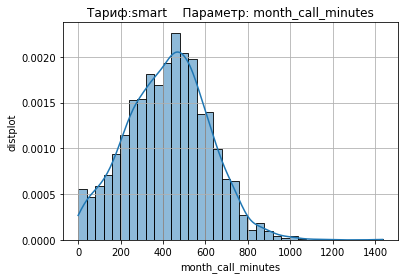

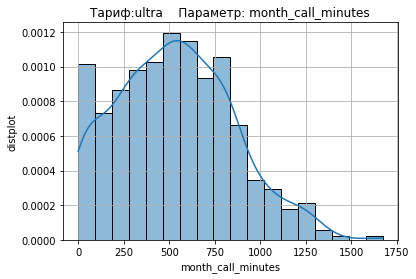

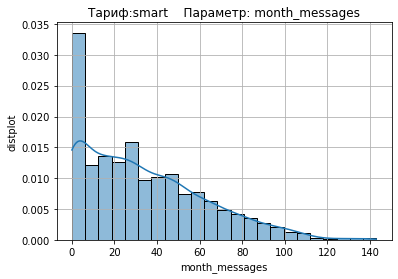

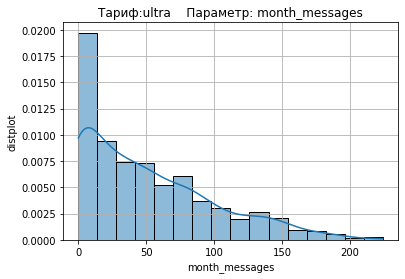

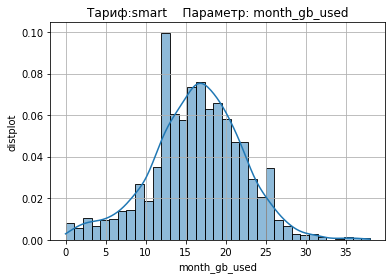

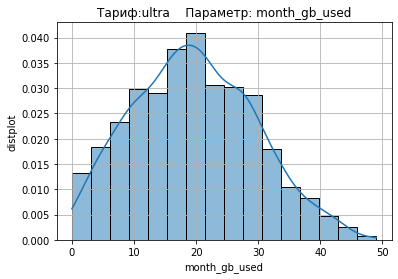

In [98]:
#используем цикл для построения гистограмм плотности
for name in array_3:
    for tariff in array_tariffs:

        sns.histplot(df[df['tariff_name']==tariff][name], kde=True, stat="density")
        plt.title(('Тариф:'+tariff+'    Параметр: '+name) )
        plt.ylabel('distplot')
        plt.grid()
        plt.show()        

Из анализа гистограмм и функций плотностей частоты можно сделать следующие выводы:
- функция плотности частоты для количества сообщений - скошенная вправо, так как и в том, и другом тарифе абоненты редко используют сообщения, много значений равных `0`
- Распределения длительности телефонных разговоров у абонентов `smart` и `ultra` близки к нормальному, но около нуля есть некторое количество значений, значит есть те, кто не расходует минуты или расходует их мало, вероятно, используя мессенджеры для звонков через интернет.
- Распределния расхода интернет-трафка близки к нормальному для двух тарифов.
- Выбивающееся значение для `month_gd_used` в тарифе `smart` связанно с неоптимальным подбором корзин (параметр `bins`), поэтому функция распределения плотности частоты более наглядна. 

Ниже пример гистограммы с числом коризин 39 для столбца `month_gb_used` и абонентов `smart`. Видно, что выбивающихся значений нет, распределние близко к нормальному:

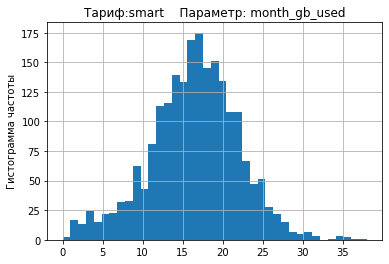

In [99]:
#гистограмма значений столбца 'month_gb_used' для абонентов 'smart'
df[df['tariff_name']=='smart']['month_gb_used'].hist(bins=39)
plt.title(('Тариф:'+'smart'+'    Параметр: '+'month_gb_used') )
plt.ylabel('Гистограмма частоты')
plt.show() 

Также ознакомимся с характеристикой выборки для рассматриваемых параметров:

In [100]:
#цикл для вывода характеристик выборки параметров тарифов
for name in array_3:
    for tariff in array_tariffs:
        print('\033[94m'+'\033[1m'+'Общая информация о выборке параметра:', name,'----> тариф:', tariff +'\033[0m'+'\033[0m')
        print(df[df['tariff_name']==tariff][name].describe())
        print()

Общая информация о выборке параметра: month_call_minutes ----> тариф: smart
count    2118.000000
mean      422.773843
std       191.203948
min         0.000000
25%       287.250000
50%       430.000000
75%       550.000000
max      1435.000000
Name: month_call_minutes, dtype: float64

Общая информация о выборке параметра: month_call_minutes ----> тариф: ultra
count     909.000000
mean      531.930693
std       320.472257
min         0.000000
25%       286.000000
50%       523.000000
75%       753.000000
max      1673.000000
Name: month_call_minutes, dtype: float64

Общая информация о выборке параметра: month_messages ----> тариф: smart
count    2118.000000
mean       33.587819
std        28.440087
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: month_messages, dtype: float64

Общая информация о выборке параметра: month_messages ----> тариф: ultra
count    909.000000
mean      51.218922
std       48.344162
min        0.00000

Здесь можно отметить, что во всех тарифах и всех параметров есть абоненты, которые в какие-то месяцы не пользуются некоторыми услугами. Также видно, что максимальные значение не различаются для тарифов Смарт и Ультра на порядки. К примеру, максимальное количество минут в Смарт - 1475, Ультра - 1673. Эти значения отличются, но на фоне 3000 доступных минут в Ультра можно сказать, что они близки.

### Вывод

В ходе анализа данных были рассмотрены клиенты, отказавшиес от тарифа и изучено поведение остальных клиентов.

**Клиенты, отказавшиеся от тарифа**:
- С тарифом `smart` отток клиентов в 1,5 раза больше, чем с тарифом `ultra`.
- 17 из 38 (44,73%) отказавшихся от тарифа человек имели превышение месячного интернет-трафика
- 14 из 17 человек использовали тариф Смарт.
- Клиенты, отказавшиеся от тарифа, исключены из рассмотрения, так как нам важны предпочтения и выручка клиентов, использующих тариф.

**Поведение клиентов**:
- Тариф Смарт более популярен среди клиентов, чем тариф Ультра, об этом можно судить по рассматриваемой выборке: **клиентов Смарт в 2,5 раза больше, чем клиентов Ультра**
- Абоненты `ultra` в среднем разговаривают 532 минуты, а `smart` 423 минуты. При этом абонентам `ultra` доступно **3000 минут разговора в месяц**, но в среднем они используют значение минут **близкое к доступному в тарифе Смарт - 532 минуты** (в Смарт досутпно 500 минут в месяц).
- Функция плотности частоты для количества сообщений - скошенная вправо, так как и в том, и другом тарифе абоненты редко используют сообщения, много значений равных `0`. В среднем абоненты `ultra` отправляют примерно на 18 сообщений больше (33 сообщения - смарт, 50 сообщений - ультра). 
- Здесь тоже стоит обратить внимание, что по тарифу Ультра **доступна 1000 сообщений в месяц**, это сильно отличается от 50 сообщений Смарт, но при этом **абоненты Ультра расходуют около 50 сообщений в месяц**.
- Расход интернет трафика в среднем по выборке: Смарт - 16,39 Гб, Ультра 19,61 Гб. Средние и медианы близки внутри тарифов. Абоненты Ультра в сренем расходуют больше интернета, чем абоненты Смарт. Доступно по тарифу: 15 Гб - Смарт, 30 Гб - Ультра. Получется, что в среднем абоненты Смарт превышают доступный интернет-трафик и вынуждены заплатить по 200 руб за каждый Гб превышения.

Из полученных данных можно предположить, что **параметры тарифа Смарт близки к реальным потребностям абонентов**, поэтому они в **2,5 раза чаще выбирают этот тариф, а не Ультра**.

## Шаг 4. Проверка гипотез

Проверим две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для проверки гипотезы сначала сформулируем нулевую гипотезу $H_0$:**средние выручки пользователей тарифов "Ультра" и "Смарт" равны (не отличаются)**.

Тогда двусторонняя альтернативная гипотеза $H_1$: **средняя выручка пользователей тарифа «Ультра» не равна выручке пользователей тарифа «Смарт»,** они могут отличаться, как в большую так и в меньшую сторону.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей **по взятым из них выборкам**, применим метод `scipy.stats.ttest_ind (array1, array2, equal_var)`.

Выберем критический уровень значимости $\alpha$ равным **5%**.


In [101]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

Сохраним выборку выручки по месяцам для тарифа Смарт:

In [102]:
#выручка по месяцам для абонентов 'smart'
smart_month_revenue = df[df['tariff_name']=='smart']['monthly_revenue']

#вывод на экран количества строк
len(smart_month_revenue)

2118

И для тарифа Ультра:

In [103]:
#выручка по месяцам для абонентов 'ultra'
ultra_month_revenue = df[df['tariff_name']=='ultra']['monthly_revenue']

#вывод на экран количества строк
len(ultra_month_revenue)

909

Создадим функцию для проверки статистических гипотез, будем использовать t-тест `ttest_ind` из библиотеки `scipy`: 

In [104]:
#функция проверки статистических гипотез
def statistical_check(sample_1, sample_2, alpha):
    
    #использование ttest_ind для двух выборок
    results = st.ttest_ind(sample_1, sample_2)
    
    #вывод p-value
    print('p-значение:', results.pvalue)
    
    #проверка правильности нулевой гипотезы
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу') 

Используем функцию для проверки нулевой гипотезы, введем выборки месячной выручки тарифов `smart` и `ultra`:

In [105]:
#используем функцию для smart_month_revenue, ultra_month_revenue с уровнем статистической значимости alpha
statistical_check(smart_month_revenue, ultra_month_revenue,alpha)

p-значение: 4.21341783798234e-144
Отвергаем нулевую гипотезу


Результат говорит о том, что есть основания отвергнуть нулевую гипотезу, p-value получилось менее установленного значения.

Посмотрим средние значения выборок:

- для тарифа Ультра:

In [106]:
ultra_month_revenue.mean()

2066.996699669967

- для тарифа Смарт:

In [107]:
smart_month_revenue.mean()

1299.489612842304

Очевидно, что проверка статистической гипотезы верна: **среднее значение месячной выручки в тарифе Ультра в 1,6 раз выше, чем в тарифе Смарт**.

Ранее было показано, что тариф Смарт более популярен: клиентов с тарифом Смарт почти в 2,5 раза больше, чем с тарифом Ультра (рассматриваем только клиентов, которые не отказались от тарифа).

Сделаем сводную таблицу, в которой посмотрим **общую выручку** за год для тарифов Смарт и Ультра, а также добавим столбец со средней выручкой:

In [108]:
# сделаем сводную таблицу по названиям тарифов
# применем функции sum и count для месячной выручки
table_tariff = df.groupby('tariff_name')['monthly_revenue'].agg(['sum','count'])

#добавим столбец со средней выручкой по тарифам
table_tariff ['mean_per_month'] = table_tariff['sum']/table_tariff['count']

#вывод на экран сводной таблицы
table_tariff

,sum,count,mean_per_month
tariff_name,,,
smart,2752319.0,2118,1299.489613
ultra,1878900.0,909,2066.996700


Мы видим, что Смарт в среднем в месяц приносит меньше денег, чем Ультра. Но за счет бОльшего числа клиентов **годовая выручка Смарта больше, чем у тарифа Ультра**.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки гипотезы сначала сформулируем нулевую гипотезу $H_0$: **средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов**.

Тогда двусторонняя альтернативная гипотеза $H_1$: **средняя выручка пользователей из Москвы НЕ равна средней выручке пользователей из других регионов**, они могут отличаться, как в большую так и в меньшую сторону.

Если не разделять датафрейм по тарифам, то вычесление средней выручки по нему будет несовсем коректным, как видно из графика выручка имеет форму седла с двумя явными пиками тарифов Смарт и Ультра:

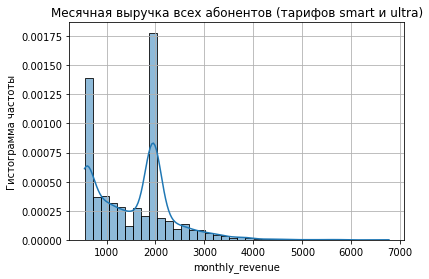

In [109]:
#используем distplot из библиотеки `seaborn`
sns.histplot(df['monthly_revenue'],  stat="density", kde=True)
plt.title(('Месячная выручка всех абонентов (тарифов smart и ultra)') )
plt.ylabel('Гистограмма частоты')
plt.grid()
plt.show()

Поэтому для начала выделим пользователей из Москвы:

In [110]:
#выделяем пользователей из Москвы
df_moscow = df[df['city']=='Москва']

Смотрим количество строк в срезе данных `df_moscow`:

In [111]:
#количество строк в срезе df_moscow
len(df_moscow)

570

Теперь выделим пользователей из других регионов:

In [112]:
#выделяем пользователей из других регионов
df_other = df[df['city']!='Москва']

Смотрим количество строк в срезе данных `df_other`:

In [113]:
#количество пользователей из других регионов
len(df_other)

2457

Для клиентов из Москвы 570 строк в таблице (по месяцам), для других регионов 2457 строк.

Далее разделим группы по регионам на подгруппы по тарифам:

In [114]:
#абоненты Смарт в Москве
moscow_smart_revenue = df_moscow[df_moscow['tariff_name']=='smart']['monthly_revenue']
#абоненты Ультра в других регионах
moscow_ultra_revenue = df_moscow[df_moscow['tariff_name']=='ultra']['monthly_revenue']


#абоненты Смарт в других регионах
other_smart_revenue = df_other[df_other['tariff_name']=='smart']['monthly_revenue']
#абоненты Ультра в других регионах
other_ultra_revenue = df_other[df_other['tariff_name']=='ultra']['monthly_revenue']

Перейдём к проверке нулевой гипотезы.

Проверим нулевую гипотезу - **средняя выручка в Москве от тарифа Смарт равна средней выручке этого тарифа в других регионах**:

In [115]:
#применяем функцию statistical_check к other_smart_revenue, moscow_smart_revenue с уровнем alpha
statistical_check(other_smart_revenue, moscow_smart_revenue, alpha)

p-значение: 0.09275845050953271
Не получилось отвергнуть нулевую гипотезу


p-value получилось около 9,276%. Нет оснований отвергать нулевую гипотезу.

Проверим следующую нулевую гипотезу - **средняя выручка в Москве от тарифа Ультра равна средней выручке этого тарифа в других регионах**:

In [116]:
#применяем функцию statistical_check к other_ultra_revenue, moscow_ultra_revenue с уровнем alpha
statistical_check(other_ultra_revenue, moscow_ultra_revenue, alpha)

p-значение: 0.46162482838492547
Не получилось отвергнуть нулевую гипотезу


Вероятность ошибиться при отклонении от нулевой гипотезы - 46%. Значит снова нет оснований её отвергать.

Выручка тарифа Смарт в регонах равна выручке тарифа Ультра?

In [117]:
#применяем функцию statistical_check к other_ultra_revenue, other_smart_revenue с уровнем alpha
statistical_check(other_ultra_revenue, other_smart_revenue, alpha)

p-значение: 2.4259500600294076e-104
Отвергаем нулевую гипотезу


Как было получено при проверке первой гипотезы (есть разница выручки тарифов Смарт и Ультра), мы видим, что это не зависит от региона: разница в выручке между тарифами есть.

Это также подтверждает проверка средних значений:

In [118]:
#среднее выручки для других регионов и тарифа Ультра
other_ultra_revenue.mean()

2062.0714285714284

In [119]:
#среднее выручки для других реонов и тарифа Сматр
other_smart_revenue.mean()

1313.0990324416618

В регионах выручка от тарифа Ультра выше, чем от тарифа Смарт.

Выручка тарифа Смарт в Москве равна выручке тарифа Ультра?

In [120]:
#применяем функцию statistical_check к moscow_smart_revenue, moscow_ultra_revenue с уровнем alpha
statistical_check(moscow_smart_revenue, moscow_ultra_revenue, alpha)

p-значение: 5.78116999260781e-46
Отвергаем нулевую гипотезу


Очевидно, что нет оснований соглашаться с нулевой гипотезой, мы снова её отвергаем. В Москве выручка Смарт и Ультра также различаются.

Теперь изучим выручку всех тарифов в Москве и в других регионах. Выделим общую выручку:

In [121]:
#в Москве
moscow_revenue = df_moscow['monthly_revenue']

#в других регионах
other_revenue = df_other['monthly_revenue']

Проверим нулевую гипотезу - месячная выручка в москве равна месячной выручке в других регионах:

In [122]:
#применяем функцию statistical_check к moscow_revenue, other_revenue,alpha с уровнем alpha
statistical_check(moscow_revenue, other_revenue,alpha)

p-значение: 0.6177577589717255
Не получилось отвергнуть нулевую гипотезу


Скорее всего это так и есть, принимаем нулевую гипотезу. 

Сделаем столбец в `df` с регионом, для этого создадим функцию:

In [123]:
#функция для выделения категории по населённому пункту
def region(column):
    if 'Москва' in column:
        return 'Москва'
    else: return 'Другие'

Применем функцию к столбцу `city`, чтобы создать новый категориальный столбец:

In [124]:
#применяем фнкуцию к столбу `city`
df['region']=df['city'].apply(region)

#проверяем результат
df['region'].value_counts()

Другие    2457
Москва     570
Name: region, dtype: int64

Сделаем сводную таблицу для визуализации результатов по регионам:

In [125]:
#сводная таблица по региону
table_region = df.groupby('region')['monthly_revenue'].agg(['sum','count'])

#новый столбец со среднем значением выручки по месяцам
table_region['mean_per_month'] = table_region['sum']/table_region['count']

#вывод на экран сводной таблицы
table_region

,sum,count,mean_per_month
region,,,
Другие,3750565.0,2457,1526.481481
Москва,880654.0,570,1545.007018


Очевидно, что месячная выручка в среднем примерно одинакова, но годовая выше для других регионов, чем для Москвы (потому что в выборке абонентов из других регионов больше, чем из Москвы).

### Вывод

В результате проверки статистических гипотез можно сделать следующий вывод:
- Средняя месячная выручка пользователей тарифов Смарт и Ультра **различаются**, подтверждено с помощью статистической проверки гипотез.
- Средняя месячная выручка тарифа Ультра - около **2066 руб.**, тарифа Смарт - около **1300 руб.** (без разделения на регионы), то есть почти в 1,6 раз.
- Но в тоже время **суммарная годовая выручка тарифа Смарт почти в 1,5 раза (1,46) больше чем для тарифа Ультра** (2 752 319 руб - Смарт, 1 878 900 руб. - Ультра за 2018 год).
- Так как в месяц тариф Ультра приносит больше денег, чем Смарт, а также **менее распространён среди клиентов**, то можно уделить ему внимание в маркетинговой компании, чтобы привлечь большее число клиентов, заинтересованных в повышенном расходе услуг (интернет-трафика и минут разговора в первую очередь).
- Но для маркетинговой компании также следует учесть, что так как **тариф Смарт более популярен**, чем Ультра (в 2,5 раза больше абонентов), и приносить большую годовую выручку, чем тариф Ультра, то, возможно, что людей, которым нужен повышенный расход услуг, меньше, чем тех, кому достаточно параметров тарифа "Смарт". Поэтому оставлять без внимания тариф Смарт в маркетинге также не стоит, чтобы не потерять этот сегмент клиентов.

## Общий вывод

<div style="border:solid green 2px; padding: 20px">


**Цель исследования** состояла в том, чтобы определить **какой тариф**  федерального оператора сотовой связи «Мегалайн» **лучше: «Смарт» или «Ультра»**. То есть какой приносит больше денег, чтобы коммерческий департамент смог скорректировать рекламный бюджет.

Для проведения исследования использованы данные о **500 клиентах компании "Мегалайн"** за 2018 год. Данные представлены **в 5 таблицах**: данные о клиентах, их звонках, сообщениях, расходе интернет-трафика и условиях тарифных планов. Есть данные о **38** клиентах (7,6% от исходной выборки) отказавшихся от тарифа.

На стадии **подготовки данных** удалён лишний столбец, изменены названия некоторых столбцов, изменён формат даты и времени, выполнено правильное окргуление длительности разговора (до минут в большую сторону) и предварительное знакомство с данными, в частности, показано отсутсвие неявных дубликатов в столбце с названием населённых пунктов. 

**Расчитаны дополнительные параметры** для каждого пользователя и собраны в отдельную сводную таблицу для дальнейшего анализа с расходами по месяцам: количество звонков и израсходованных минут, отправленных сообщений, объём израсходованного интернет-трафика. При расчете интернет-трафика учтено правильное округление в большую сторону до гигабайт. Также рассчитана **помесячная выручка для каждого пользователя**.
    
**В результате проведённого анализа и статистической проверки гипотез получены следующие результаты**:
   
**1. Клиенты, отказавшиеся от тарифа**
   
1.1. С тарифом `smart` отток клиентов в 1,5 раза больше, чем с тарифом `ultra`.

1.2. 17 из 38 (44,73%) отказавшихся от тарифа человек имели превышение месячного интернет-трафика (14 из них имели тариф Смарт).

1.3. Клиенты, отказавшиеся от тарифа, исключены из рассмотрения, так как нам важны предпочтения и выручка клиентов, использующих тариф.
    
**2. Поведение клиентов**
    
2.1. Тариф Смарт более популярен среди клиентов, чем тариф Ультра, об этом можно судить по рассматриваемой выборке: **клиентов Смарт в 2,5 раза больше, чем клиентов Ультра**.
    
2.2. Абоненты `smart` и `ultra` имеют разную среднюю продолжительность телефонного разговора. Абоненты `ultra` в среднем разговаривают 532 минуты, а `smart` 423 минуты.

2.3. Стоит обратить внимание, что абонентам `ultra` доступно **3000 минут разговора в месяц**, но в среднем они используют значение минут **близкое к доступному в тарифе Смарт - 532 минуты** (в Смарт досутпно 500 минут в месяц).

2.4. Для количества сообщений имеется скос данных в право, так как очень много значений `0`, то есть **SMS непопулярный вид связи** среди абонентов двух тарифов, но в среднем абоненты `ultra` отправляют примерно на 18 сообщений больше (33 сообщения - смарт, 50 сообщений - ультра). 
    
2.5. Здесь тоже стоит обратить внимание, что по тарифу Ультра **доступна 1000 сообщений в месяц**, это сильно отличается от 50 сообщений Смарт, но при этом **абоненты Ультра расходуют около 50 сообщений в месяц**.

2.6. Расход интернет трафика в среднем по выборке: Смарт - 16,39 Гб, Ультра 19,61 Гб. Абоненты Ультра в сренем расходуют больше интернета, чем абоненты Смарт. Доступно по тарифу: 15 Гб - Смарт, 30 Гб - Ультра. 

2.7. Получется, что в среднем абоненты Смарт превышают доступный интернет-трафик и вынуждены заплатить по 200 руб за каждый Гб превышения. Но абонентская плата Смарт - 500 руб, Ультра - 1950 руб. В некоторых случаях проще оплатить превышение, чем переходить на более дорогой тариф. Это может быть одной из причин популярности тарифа Смарт.

Из полученных данных можно предположить, что **параметры тарифа Смарт близки к реальным потребностям абонентов**, поэтому они в **2,5 раза чаще выбирают этот тариф, а не Ультра**. Средние занчения расходов услуг в тарифах Смарт и Ультра отличаются, но не порядки.
    
**3. Статистическая проверка гипотез**

3.1. Средняя месячная выручка пользователей тарифов Смарт и Ультра **различаются**, подтверждено с помощью статистической проверки гипотез.
    
3.2. Средняя месячная выручка тарифа Ультра - около **2066 руб.**, тарифа Смарт - около **1300 руб.** (без разделения на регионы), то есть почти в 1,6 раз.
 
3.3. Но в тоже время **суммарная годовая выручка тарифа Смарт почти в 1,5 раза (1,46) больше чем для тарифа Ультра** (2 752 319 руб - Смарт, 1 878 900 руб. - Ультра за 2018 год).

3.4. Так как в месяц тариф Ультра приносит больше денег, чем Смарт, а также **менее распространён среди клиентов**, то можно уделить ему внимание в маркетинговой компании, чтобы привлечь большее число клиентов, заинтересованных в повышенном расходе услуг (интернет-трафика и минут разговора в первую очередь).

3.5. Но для маркетинговой компании также следует учесть, что так как **тариф Смарт более популярен**, чем Ультра (в 2,5 раза больше абонентов), и **приносит большую годовую выручку**, чем тариф Ультра, то, возможно, что людей, которым нужен повышенный расход услуг, меньше, чем тех, кому **достаточно параметров тарифа "Смарт"**. Поэтому оставлять без внимания тариф Смарт в маркетинговой компании также не стоит, чтобы не потерять этот сегмент клиентов.